In [2]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from mtist import infer_mtist as im
from mtist import mtist_utils as mu
from mtist import graphing_utils as gu

from glob import glob

%config InlineBackend.figure_format='retina'

plt.rcParams["svg.fonttype"] = "none"
# plt.rcParams.update({"font.family": "Computer Modern"})

rng = np.random.default_rng(11206)

In [3]:
meta_food = (
    pd.read_csv("../mtist1.0/mtist_datasets_food/mtist_metadata.csv")
    .drop(columns=["Unnamed: 0"])
    .set_index("did")
)

meta_nofood = (
    pd.read_csv("../mtist1.0/mtist_datasets_nofood/mtist_metadata.csv")
    .drop(columns=["Unnamed: 0"])
    .set_index("did")
)

In [4]:
###########################################################################################################
# Obtain normal ES Scores for 
############################################################################################################


# methods = ["default_food", "default_ignore_food", "default_food_arithm", "default_ignore_food_arithm", 
#            "ridge_CV_food", "ridge_CV_ignore_food", "ridge_CV_food_arithm", "ridge_CV_ignore_food_arithm"]

methods = ["default_food", "default_ignore_food", "ridge_CV_food", "ridge_CV_ignore_food"]
# methods = ["default_food_arithm", "default_ignore_food_arithm", "ridge_CV_food_arithm", "ridge_CV_ignore_food_arithm"]
################################################################################

es_food = {
    method: pd.read_csv(
        f"../mtist1.0/mtist_datasets_food/{method}_inference_result/{method}_es_scores.csv"
    )["raw"]
    for method in methods
}

es_nofood = {
    method: pd.read_csv(
        f"../mtist1.0/mtist_datasets_nofood/{method}_inference_result/{method}_es_scores.csv"
    )["raw"]
    for method in methods
}

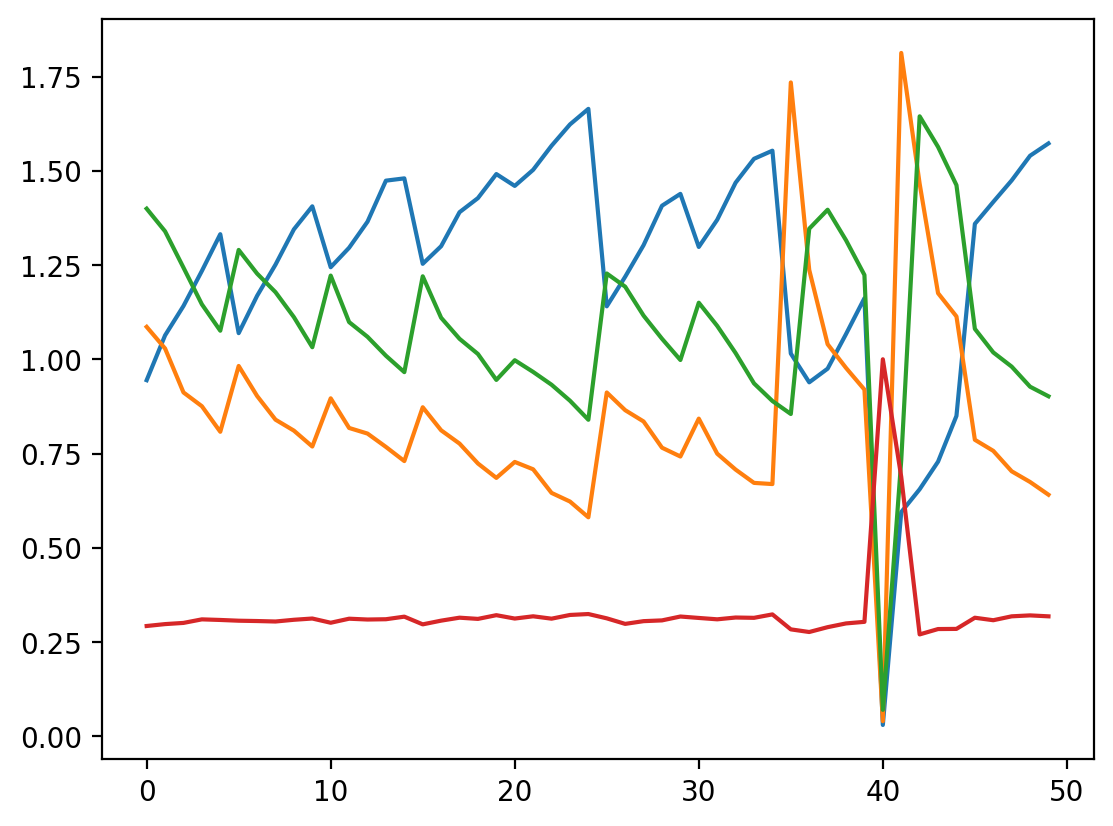

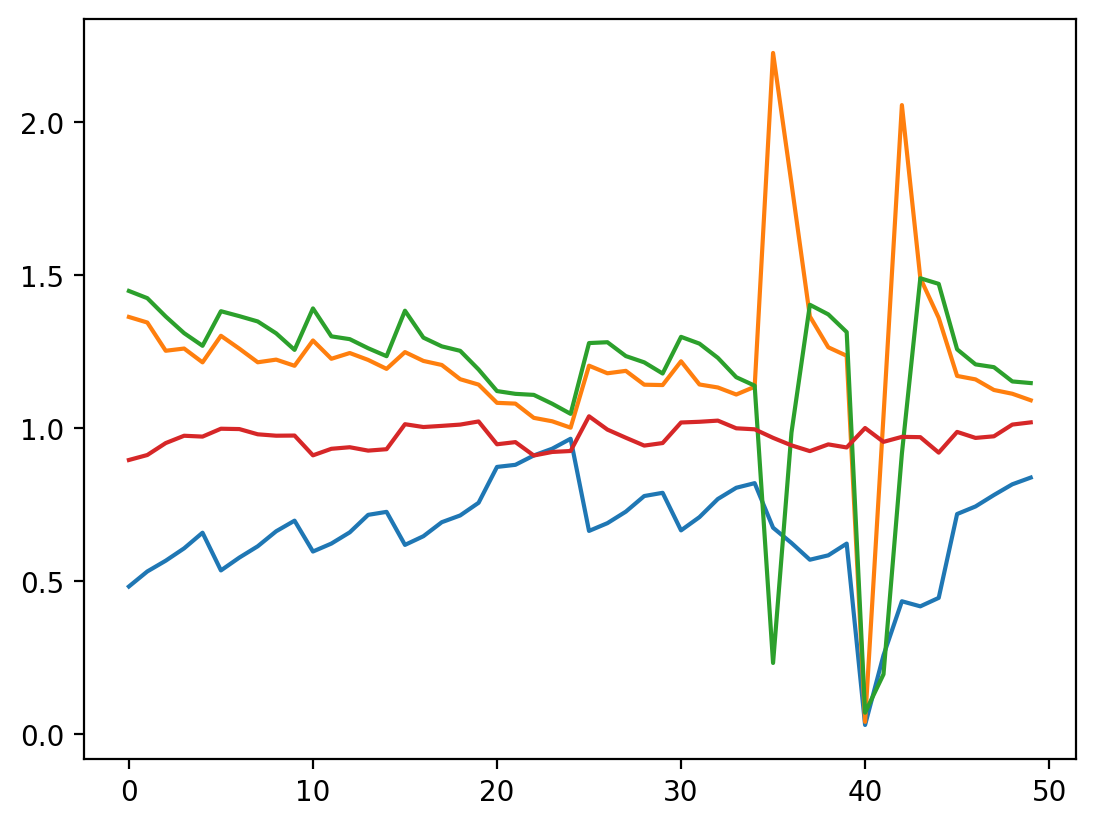

In [5]:
dataset = pd.read_csv(f"../mtist1.0/mtist_datasets_food/dataset_0.csv")
plt.plot(dataset[[f"species_{i}" for i in range(3)]])
plt.plot(dataset["food"])
plt.show()

dataset = pd.read_csv(f"../mtist1.0/mtist_datasets_nofood/dataset_0.csv")
plt.plot(dataset[[f"species_{i}" for i in range(3)]])
plt.plot(dataset["food"])
plt.show()

In [6]:
expanded_nulls = {
    n_species: pd.read_csv(f"null_models/null_df_{n_species}sp.csv")
    .drop(columns=["Unnamed: 0"])[f"{n_species}-sp_null"]
    .values
    for n_species in [3]#, 10, 100]
}

display(expanded_nulls)
# display(expanded_nulls_strong)

{3: array([0.33333333, 0.55555556, 0.66666667, ..., 0.66666667, 0.44444444,
        0.33333333])}

In [7]:
data_food = pd.DataFrame(es_food)
data_nofood = pd.DataFrame(es_nofood)

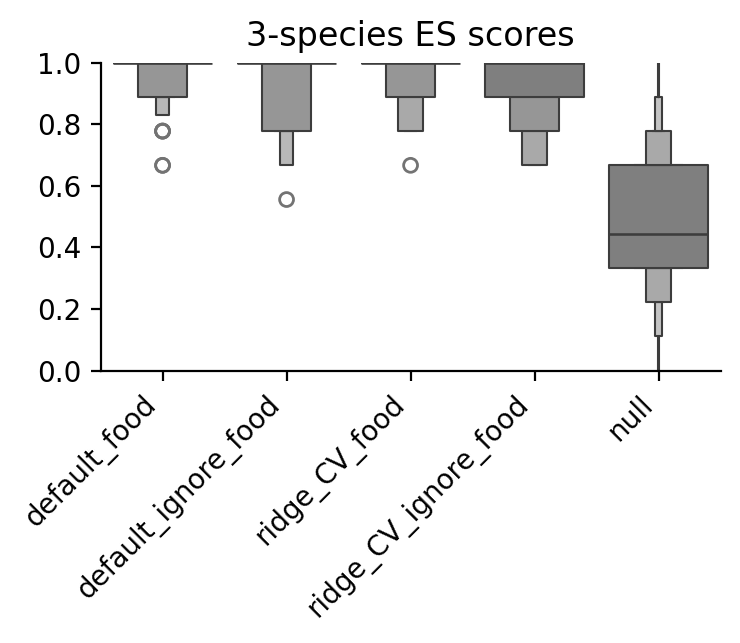

In [8]:
order = methods + ["null"]

fig, ax = gu.easy_subplots(nrows=1, base_figsize=(4, 2), sharex=True, sharey=False)

# for n_species, ax in zip([3], axes):
n_species = 3
# ax = axes[0]
sns.boxenplot(
data=(
    pd.Series(expanded_nulls[n_species])
    .to_frame("null")
    .join(data_food.loc[meta_food.query("n_species == @n_species").index])[order]
),
ax=ax,
color="tab:gray",
)

ax.set_title(f"{n_species}-species ES scores")

plt.xticks(rotation=45, ha="right")
# plt.xticks(range(len(order)), labels + ["Null"])

# ax[1].set_ylim(0, 1)
ax.set_ylim(0, 1)
# ax[2].set_ylim(0.44, 0.56)
# ax[2].set_yticks(np.around(np.linspace(0.40, 0.60, 5), decimals=2))

sns.despine()
# plt.tight_layout()

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4bc", "figure_4b"),
#     ft="svg",
# )

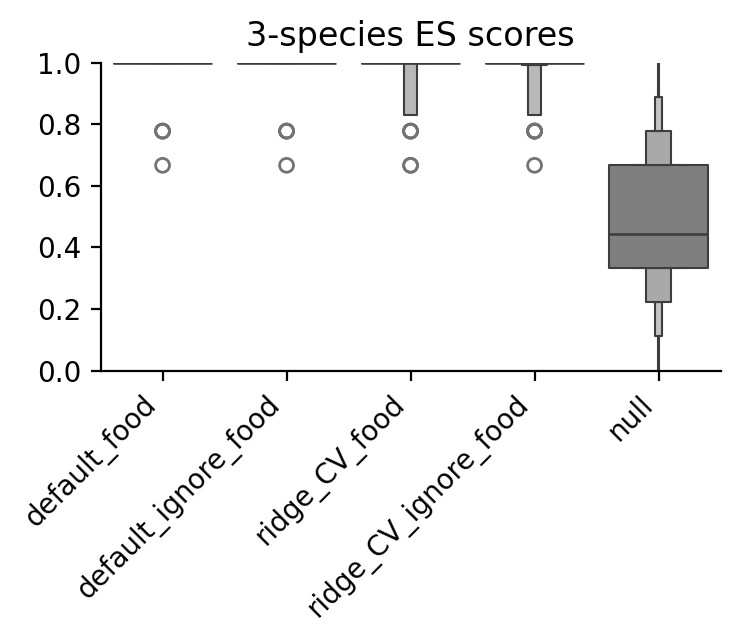

In [9]:
order = methods + ["null"]

fig, ax = gu.easy_subplots(nrows=1, base_figsize=(4, 2), sharex=True, sharey=False)

# for n_species, ax in zip([3], axes):
n_species = 3
# ax = axes[0]
sns.boxenplot(
data=(
    pd.Series(expanded_nulls[n_species])
    .to_frame("null")
    .join(data_nofood.loc[meta_nofood.query("n_species == @n_species").index])[order]
),
ax=ax,
color="tab:gray",
)

ax.set_title(f"{n_species}-species ES scores")

plt.xticks(rotation=45, ha="right")
# plt.xticks(range(len(order)), labels + ["Null"])

# ax[1].set_ylim(0, 1)
ax.set_ylim(0, 1)
# ax[2].set_ylim(0.44, 0.56)
# ax[2].set_yticks(np.around(np.linspace(0.40, 0.60, 5), decimals=2))

sns.despine()
# plt.tight_layout()

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4bc", "figure_4b"),
#     ft="svg",
# )

In [10]:
data_food.mean(0)

default_food            0.969907
default_ignore_food     0.951389
ridge_CV_food           0.966821
ridge_CV_ignore_food    0.939043
dtype: float64

In [11]:
data_nofood.mean(0)

default_food            0.993056
default_ignore_food     0.993056
ridge_CV_food           0.989198
ridge_CV_ignore_food    0.988426
dtype: float64

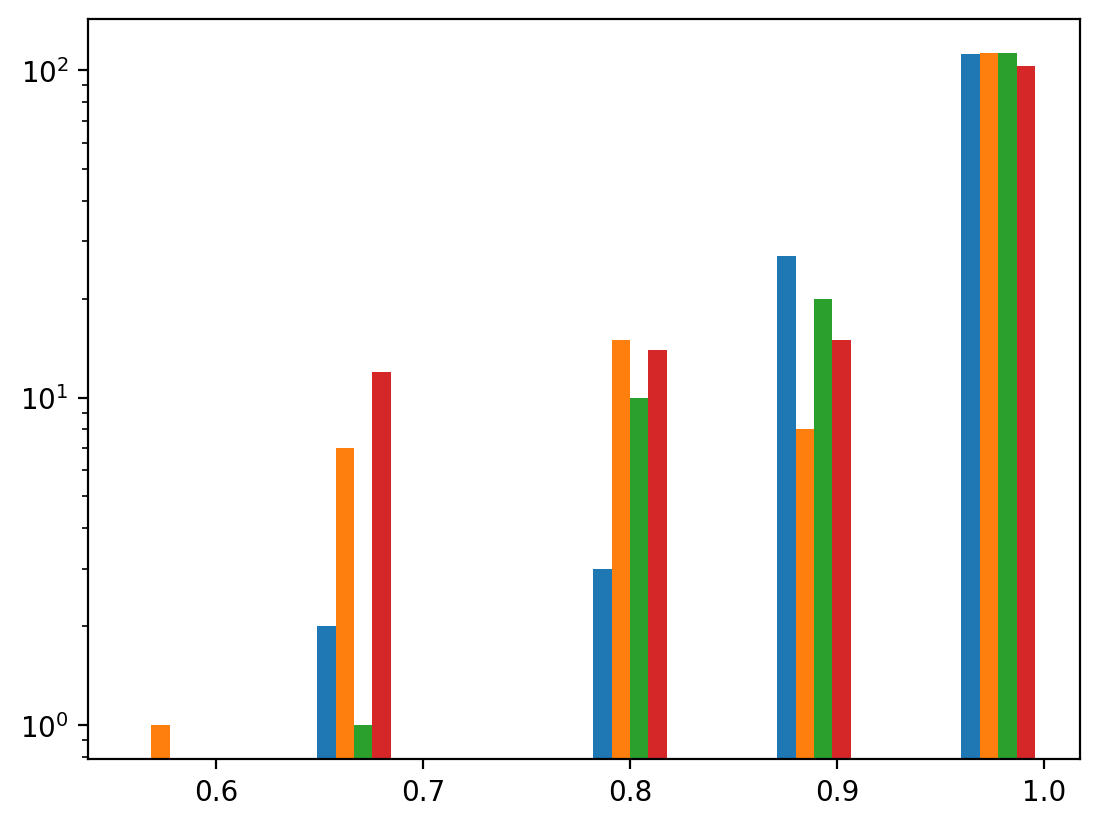

In [15]:
# plt.hist(data_nofood.values)
plt.hist(data_food)
plt.yscale("log")

(array([[  1.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0., 140.],
        [  1.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0., 140.],
        [  2.,   0.,   0.,   3.,   0.,   0.,   2.,   0.,   0., 137.],
        [  1.,   0.,   0.,   4.,   0.,   0.,   4.,   0.,   0., 135.]]),
 array([0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 4 BarContainer objects>)

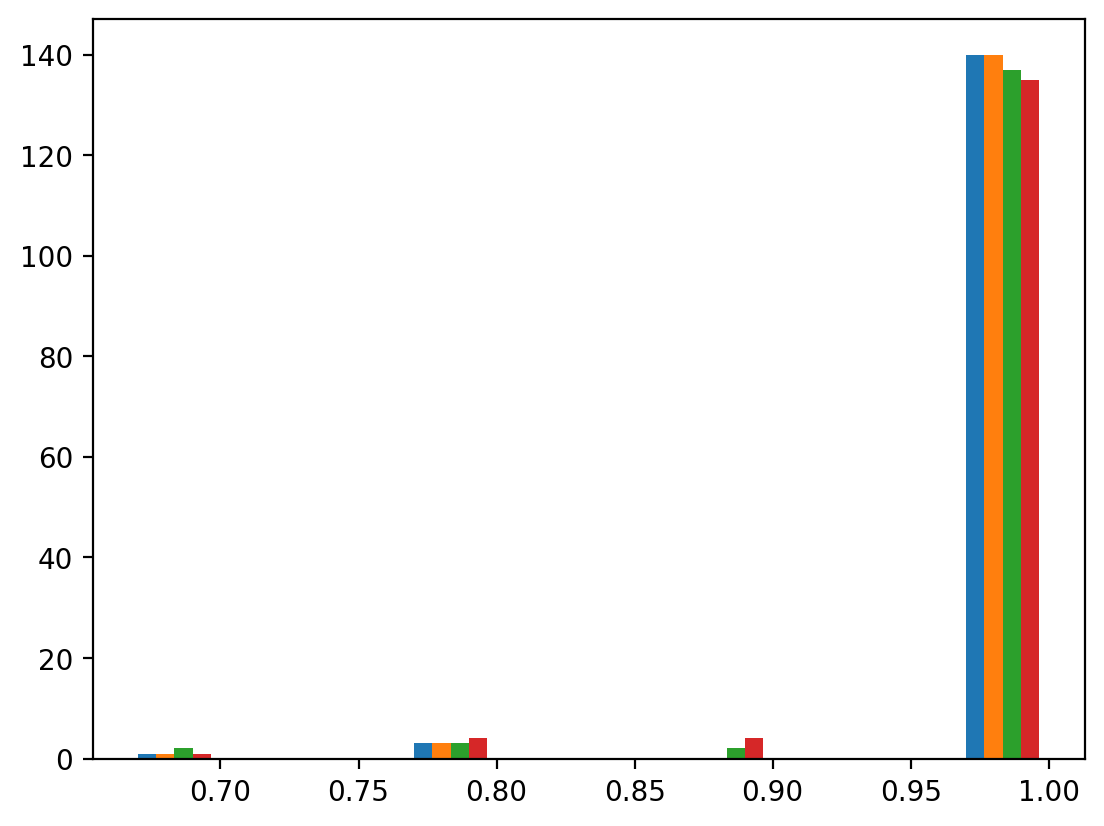

In [13]:
# plt.hist(data_nofood.values)
plt.hist(data_nofood)
# plt.yscale("log")